In [18]:
from tools.DataLoader import DataLoader
from tools.ULModelEvaluator import ULModelEvaluator
from tools.ULModelTrainer import ULModelTrainer
from transformers.AddCountFeatureTransformer import AddCountFeatureTransformer
from tools.EDA import EDA
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector

In [19]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(
    request_type="local", path="db/mod_05_topic_10_various_data.pkl"
)
df_dict = data_loader.load_data()
df = df_dict["concrete"]

In [20]:
# Step 2: Perform EDA using the EDA class
eda = EDA(df)

# Perform EDA using the EDA class
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

,Column,Has_Nulls,Dtype
Cement,Cement,False,float64
BlastFurnaceSlag,BlastFurnaceSlag,False,float64
FlyAsh,FlyAsh,False,float64
Water,Water,False,float64
Superplasticizer,Superplasticizer,False,float64
CoarseAggregate,CoarseAggregate,False,float64
FineAggregate,FineAggregate,False,float64
Age,Age,False,int64
CompressiveStrength,CompressiveStrength,False,float64



Dataset Shape:

(1030, 9)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CompressiveStrength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6



Missing Values:



Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64


Sample Data:



,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
# Feature Engineering Pipeline
feature_engineering_pipeline = Pipeline(
    steps=[
        (
            "add_count",
            AddCountFeatureTransformer(
                material_columns=[
                    "Cement",
                    "BlastFurnaceSlag",
                    "FlyAsh",
                    "Water",
                    "Superplasticizer",
                    "CoarseAggregate",
                    "FineAggregate",
                ],
                new_feature_name="Count",
            ),
        ),
        # ("passthrough", "passthrough"),
    ]
)

In [22]:
# Define categorical transformer
cat_transformer = Pipeline(
    steps=[
        ("passthrough", "passthrough"),
    ]
)

# Define numerical transformer
num_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())
        # ("pasathrough", "passthrough")
    ]
)

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        (
            "cat",
            cat_transformer,
            make_column_selector(dtype_include=[object, "category"]),
        ),
    ],
    n_jobs=-1,
    verbose_feature_names_out=False,
).set_output(transform="pandas")

In [23]:
# Create full preprocessing pipeline with feature engineering and preprocessor
full_preprocessing_pipeline = Pipeline(
    steps=[
        ("feature_engineering", feature_engineering_pipeline),
        ("preprocessing", preprocessor),
        ("finalpreprocessing", "passthrough"),
    ]
)

In [24]:
# Create full pipeline with preprocessing and model
full_pipeline_kmeans = Pipeline(
    steps=[
        ("full_preprocessing", full_preprocessing_pipeline),
        ("model", KMeans()),
    ]
)

In [25]:
# # Create full pipeline with preprocessing and DBSCAN model
# full_pipeline_dbscan = Pipeline(
#     steps=[("full_preprocessing", full_preprocessing_pipeline), ("model", DBSCAN())]
# )

In [26]:
# # Create full pipeline with Agglomerative Clustering model
# full_pipeline_agglomerative = Pipeline(
#     steps=[
#         ("full_preprocessing", full_preprocessing_pipeline),
#         ("model", AgglomerativeClustering()),
#     ]
# )

In [27]:
# Define the parameter grid
param_grids = {
    "kmeans": {
        "model__n_clusters": [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "model__random_state": [40],
    },
    # "dbscan": {"model__eps": [0.5, 1.0, 1.5], "model__min_samples": [5, 10, 15]},
    # "agglomerative": {
    #     "model__n_clusters": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    #     "model__linkage": ["ward", "complete", "average", "single"],
    # },
}

In [28]:
# Combine pipelines into a dictionary
model_pipelines = {
    "kmeans": full_pipeline_kmeans,
    # "dbscan": full_pipeline_dbscan,
    # "agglomerative": full_pipeline_agglomerative,
}

In [29]:
# Create an instance of ClusterPipeline and train models
model_trainer = ULModelTrainer()
model_trainer.train(
        df,
        model_pipelines,
        param_grids,
        scoring="silhouette_score",
        cv=5
    )

In [30]:
df_fe = feature_engineering_pipeline.fit_transform(df)
df_transformed = full_preprocessing_pipeline.fit_transform(df)

In [31]:
cluster_labels_dict = {
    model_name: model_trainer.predict(df)
    for model_name in model_trainer.best_models
}

In [32]:
evaluator = ULModelEvaluator()

In [33]:
evaluator.visualize_pipeline(
    model_trainer.best_model_name, model_trainer.best_models
)

Pipeline(steps=[('full_preprocessing',
                 Pipeline(steps=[('feature_engineering',
                                  Pipeline(steps=[('add_count',
                                                   AddCountFeatureTransformer(material_columns=['Cement',
                                                                                                'BlastFurnaceSlag',
                                                                                                'FlyAsh',
                                                                                                'Water',
                                                                                                'Superplasticizer',
                                                                                                'CoarseAggregate',
                                                                                                'FineAggregate']))])),
                                 ('preprocessing',
                                  ColumnTransformer(n_jobs=-1,
                                                    transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    Sta...er())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x754b78bcb320>),
                                                                  ('cat',
                                                                   Pipeline(steps=[('passthrough',
                                                                                    'passthrough')]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x754b78bcbce0>)],
                                                    verbose_feature_names_out=False)),
                                 ('finalpreprocessing', 'passthrough')])),
                ('model', KMeans(n_clusters=5, random_state=40))])

In [34]:
evaluator.display_results(
    df_transformed,
    cluster_labels_dict,
    model_trainer.best_models,
    model_trainer.best_params,
    model_trainer.best_scores,
    model_trainer.best_model_name,
    scoring_method="silhouette_score",
    help_text=True,
)

Evaluation Metrics (for entire dataset):


,Model,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,kmeans,0.247292,1.483892,241.952678



Best Parameters for Each Model (found during cross-validation):


,Model,model__n_clusters,model__random_state
0,kmeans,5,40



Best Model Score (based on cross-validation score):


,Model,silhouette_score
0,kmeans,0.3329



Metric Explanations:
Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters.
  - Range: [-1, 1], higher is better.
  - Higher values indicate better-defined clusters.
Davies-Bouldin Index: Measures the average similarity ratio of each cluster with its most similar cluster.
  - Range: [0, ∞), lower is better.
  - Lower values indicate better clustering.
Calinski-Harabasz Index: Ratio of the sum of between-cluster dispersion to within-cluster dispersion.
  - Range: [0, ∞), higher is better.
  - Higher values indicate better-defined clusters.


In [35]:
cluster_labels_best_model = cluster_labels_dict[model_trainer.best_model_name]

In [36]:
# Generate cluster report for the overall best model
cluster_report = evaluator.generate_cluster_report(df_fe, cluster_labels_best_model)
display(cluster_report)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,Count,ObjectCount
Cluster,,,,,,,,,,,
0,213.70,0.00,121.6,167.0,8.1,1014.3,793.50,28.0,33.360,6.0,285
1,339.00,0.00,0.0,192.0,0.0,978.0,775.00,28.0,31.650,4.0,245
2,387.00,117.20,0.0,160.7,11.6,938.0,782.50,28.0,56.620,6.0,187
3,186.20,189.00,0.0,192.0,0.0,965.4,748.50,28.0,26.920,5.0,175
4,252.05,110.75,123.0,193.3,8.5,877.6,749.15,28.0,32.325,7.0,138


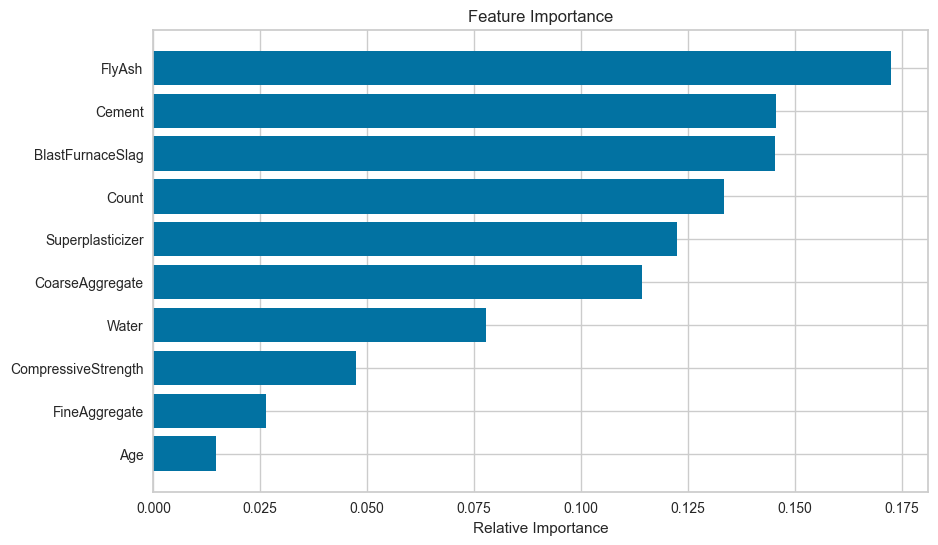

In [37]:
# Evaluate feature importance for the overall best model
evaluator.feature_importance(df_transformed, cluster_labels_best_model, df_fe)